# Part 7 -- Tuning Hyperparameters (Support Vector Classification)

Using GridSearchCV to find the best parameters to optimize our model.

**Load lib codes**

In [1]:
from os import chdir
chdir('/home/jovyan/work/Analyzing_Unstructured_Data_for_Finance/Analyzing_Unstructured_Data_for_Finance/')

from lib import *
# suppress_warnings()

In [2]:
X_train = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.X_train.pickle')

In [3]:
y_train = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.y_train.pickle')

In [4]:
X_test = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.X_test.pickle')

In [5]:
y_test = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.y_test.pickle')

In [6]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier

In [7]:
svm = SVC().fit(X_train, y_train)

In [11]:
print("Training set score: \t{}".format(svm.score(X_train, y_train)))
print("Test set score: \t{}".format(svm.score(X_test, y_test)))

Training set score: 	0.5617253988285927
Test set score: 	0.5597333678488221


In [12]:
params = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
}

In [13]:
svm_gs = GridSearchCV(SVC(), param_grid=params, n_jobs=-1, cv=StratifiedShuffleSplit(n_splits=5, random_state=42))

In [15]:
start = datetime.now()

svm_gs.fit(X_train, y_train)

end = datetime.now()
print(end - start)

KeyboardInterrupt: 

In [ ]:
cv_results = pd.DataFrame(svm_gs.cv_results_)
cv_results[['mean_test_score', 'mean_train_score','params', 'rank_test_score']][(cv_results['rank_test_score']==1)].T

In [ ]:
pd.DataFrame(svm_gs.predict(X_test)).sample(5)

In [ ]:
pd.DataFrame(svm_gs.predict_proba(X_test)).sample(5)

# HOW DO I TIE THIS BACK TO WORDS? WHAT DO THESE MEAN?

In [57]:
X_tfidf = joblib.load(../Analyzing_Unstructured_Data_for_Finance/data/)

SyntaxError: invalid syntax (<ipython-input-57-7cac870749f9>, line 1)

In [ ]:
X_test[15442]

In [ ]:
tfidf = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.tfidf_transformer.pickle')

In [ ]:
tfidf.inverse_transform(X_test[15431])

In [ ]:
svm_gs.cv_results_

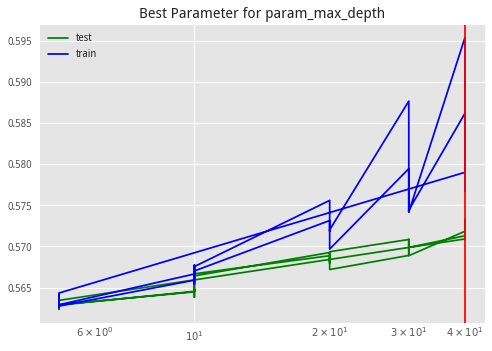

In [19]:
model_graph = pd.DataFrame(rf_gs.cv_results_)
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'], c='g', label='test')
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'], c='b', label='train')
plt.axvline(rf_gs.best_estimator_.max_depth, c='r')
plt.xscale("log")
plt.title("Best Parameter for param_max_depth")
plt.legend()

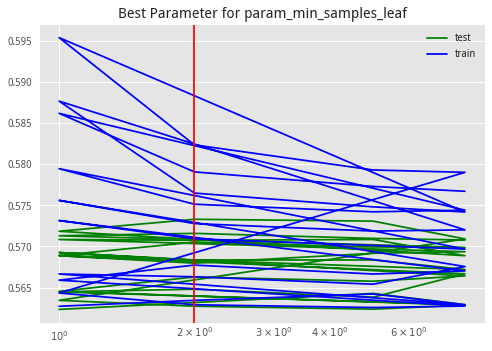

In [22]:
model_graph = pd.DataFrame(rf_gs.cv_results_)
plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_test_score'], c='g', label='test')
plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_train_score'], c='b', label='train')
plt.axvline(rf_gs.best_estimator_.min_samples_leaf, c='r')
plt.xscale("log")
plt.title("Best Parameter for param_min_samples_leaf")
plt.legend()